In [53]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [54]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [57]:
import tensorflow as tf

In [58]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

tf.Tensor(3.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)


In [59]:
# Describe data to Analyze
print(df.columns.values)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'sales' 'salary']


In [60]:
# Analyze the distribution of numerical feature values
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [61]:
# Preview the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [62]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [64]:
df.describe(include=['O'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [65]:
df['salary'] = df['salary'].map( {'high':2 ,'medium': 1, 'low':
0} ).astype(int)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [66]:
old = []
for obj in df['sales']:
    if obj not in old:
        print(obj)
        old.append(obj)

sales
accounting
hr
technical
support
management
IT
product_mng
marketing
RandD


In [67]:
df['sales'] = df['sales'].map( {'sales':9 , 'accounting':8 , 'hr':7,
'technical':6, 'support':5, 'management':4, 'IT':3,
'product_mng':2, 'marketing':1, 'RandD':0} ).astype(float)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,9.0,0
1,0.80,0.86,5,262,6,0,1,0,9.0,1
2,0.11,0.88,7,272,4,0,1,0,9.0,1
3,0.72,0.87,5,223,5,0,1,0,9.0,0
4,0.37,0.52,2,159,3,0,1,0,9.0,0


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.015170,0.098119
sales,-0.015413,-0.011855,-0.005577,0.002387,0.001611,-0.019215,0.043814,-0.015170,1.000000,-0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.033415,1.000000


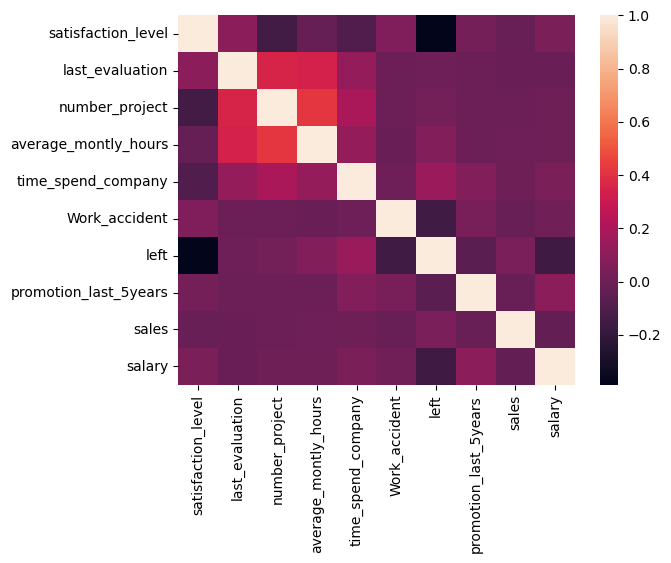

In [68]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
 xticklabels=corr.columns.values,
 yticklabels=corr.columns.values)
corr

In [69]:
df[['left', 'satisfaction_level']].groupby(['left'],
as_index=False).mean().sort_values(by='satisfaction_level',
ascending=False)

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [70]:
df[['left', 'Work_accident']].groupby(['left'],
as_index=False).mean().sort_values(by='Work_accident',
ascending=False)

,left,Work_accident
0,0,0.175009
1,1,0.047326


In [71]:
df[['left', 'time_spend_company']].groupby(['time_spend_company'],
as_index=False).mean().sort_values(by='left', ascending=False)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


In [73]:
df[['left', 'salary']].groupby(['salary'],
as_index=False).mean().sort_values(by='left', ascending=False)

,salary,left
0,0,0.296884
1,1,0.204313
2,2,0.066289


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


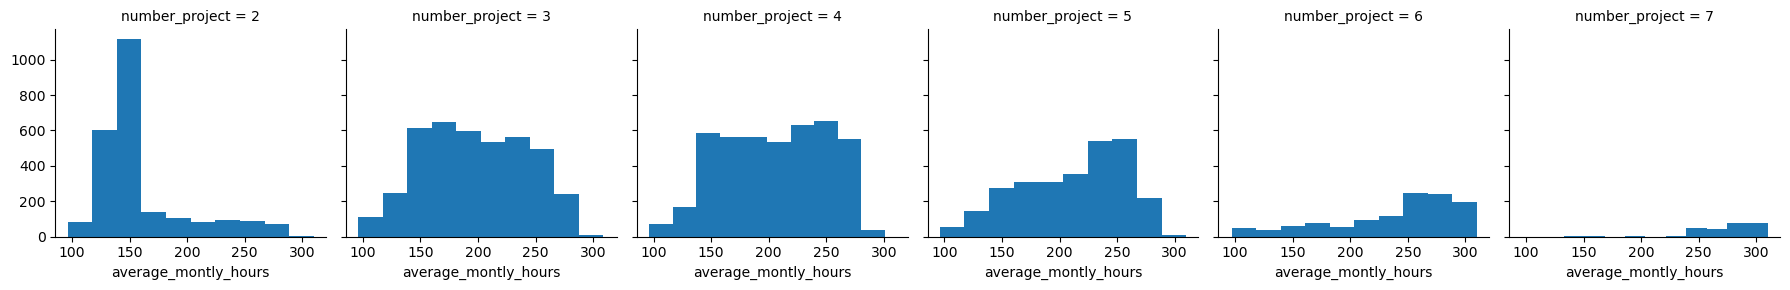

In [74]:
g = sns.FacetGrid(df, col='number_project')
g.map(plt.hist, 'average_montly_hours', bins=10)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


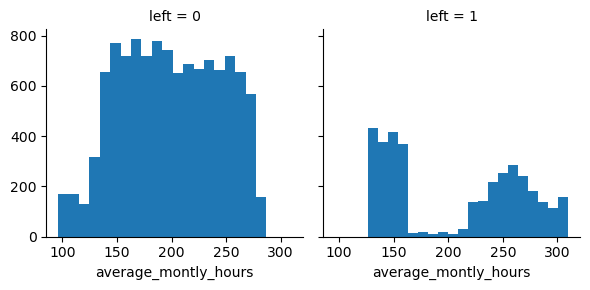

In [75]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'average_montly_hours', bins=20)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


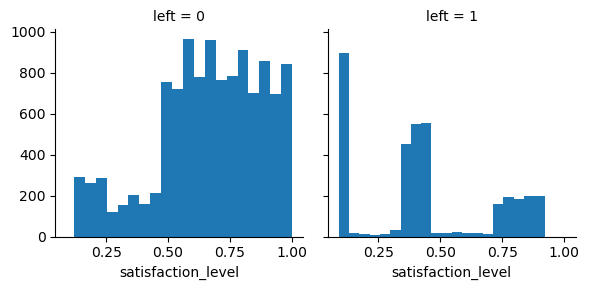

In [76]:
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'satisfaction_level', bins=20)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


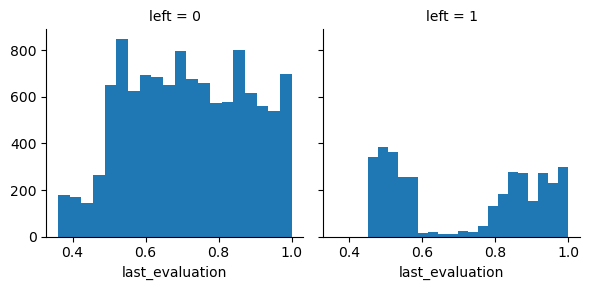

In [77]:
#From the above graph, we see a high left rate between 0.25-0.5 and also >0.75
df.loc[ df['satisfaction_level'] <= 0.25, 'satisfaction_level'] = 0
df.loc[(df['satisfaction_level'] > 0.25) & (df['satisfaction_level']
<= 0.5), 'satisfaction_level'] = 1
df.loc[(df['satisfaction_level'] > 0.5) & (df['satisfaction_level'] <=
0.75), 'satisfaction_level'] = 0
df.loc[ df['satisfaction_level'] > 0.75, 'satisfaction_level'] = 1
df['satisfaction_level'] = df['satisfaction_level'].astype(int)
g = sns.FacetGrid(df, col='left')
g.map(plt.hist, 'last_evaluation', bins=20)

In [78]:
df.loc[ df['last_evaluation'] <= 0.56, 'last_evaluation'] = 0
df.loc[(df['last_evaluation'] > 0.56) & (df['last_evaluation'] <=
0.80), 'last_evaluation'] = 1
df.loc[ df['last_evaluation'] > 0.80, 'last_evaluation'] = 0
df['last_evaluation'] = df['last_evaluation'].astype(int)

In [79]:
df["proj*hour"] = df.number_project * df.average_montly_hours
df.loc[:,
['proj*hour','number_project','average_montly_hours']].head(10)

,proj*hour,number_project,average_montly_hours
0,314,2,157
1,1310,5,262
2,1904,7,272
3,1115,5,223
4,318,2,159
5,306,2,153
6,1482,6,247
7,1295,5,259
8,1120,5,224
9,284,2,142


In [80]:
df = df.drop(['number_project','average_montly_hours'], axis=1)

In [81]:
nHead = int(len(df)*0.85)
nTail = int(len(df)*0.15)
X_train = df.drop("left", axis=1).head(nHead)
X_test = df.drop("left", axis=1).tail(nTail)
Y_train = df["left"].head(nHead)
Y_test = df["left"].tail(nTail)
X_train.shape, X_test.shape

((12749, 8), (2249, 8))

In [82]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

84.62

In [83]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

95.86

In [49]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100,
2)
acc_decision_tree

99.64